In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sohaibabdullah","key":"8c8ea75827c8e939255e39a557ecbf6d"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08           1040  
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20            580  
balraj98/stanford-background-dataset                              Stanford Background Dataset                           17MB  2020-09-26 12:57:59             84  
nehaprabhavalkar/indian-food-101                                  Indian Food 101                                        7KB  2020-09-30 06:23:43            888  
christianlillelund/don

In [ ]:
! kaggle datasets download paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:30<00:00, 55.0MB/s]
100% 2.29G/2.29G [00:30<00:00, 80.2MB/s]


In [ ]:
! mkdir data

In [ ]:
!unzip /content/chest-xray-pneumonia.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0447-0001.jpeg  

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
normal_chest = cv2.imread('/content/data/chest_xray/train/NORMAL/IM-0119-0001.jpeg')

In [ ]:
normal_chest.shape

(1434, 1810, 3)

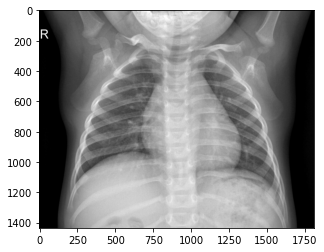

In [ ]:
normal_chest = cv2.cvtColor(normal_chest, cv2.COLOR_BGR2RGB)
plt.imshow(normal_chest)

In [ ]:
pneumonia_chest = cv2.imread('/content/data/chest_xray/train/PNEUMONIA/person1002_bacteria_2933.jpeg')
pneumonia_chest.shape

(940, 1242, 3)

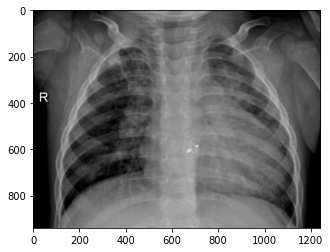

In [ ]:
pneumonia_chest = cv2.cvtColor(pneumonia_chest, cv2.COLOR_BGR2RGB)
plt.imshow(pneumonia_chest)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale = 1/255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip = True,
                               fill_mode='nearest')

In [ ]:
image_gen.random_transform(pneumonia_chest)
print('done')

done


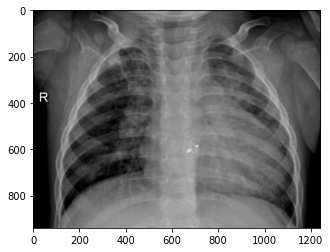

In [ ]:
plt.imshow(pneumonia_chest)

done


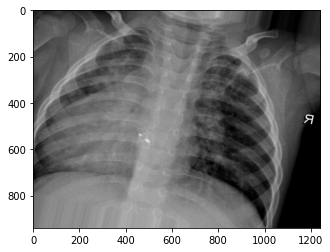

In [ ]:
plt.imshow(image_gen.random_transform(pneumonia_chest))
print('done')

In [ ]:
image_gen.flow_from_directory('/content/data/chest_xray/train')

Found 5216 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory('/content/data/chest_xray/val')

Found 16 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory('/content/data/chest_xray/test')

Found 624 images belonging to 2 classes.


In [ ]:
input_shape=(250,250,3)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, Dropout

In [ ]:
model = Sequential()
#block 1
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#block 2
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#block 2
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 53824)             0

In [ ]:
input_shape[:2]

(250, 250)

In [ ]:
batch_size =32
train_gen = image_gen.flow_from_directory('/content/data/chest_xray/train',
                                          target_size=input_shape[:2],
                                          batch_size=batch_size,
                                          class_mode='binary')

val_gen = image_gen.flow_from_directory('/content/data/chest_xray/val',
                                          target_size=input_shape[:2],
                                          batch_size=batch_size,
                                          class_mode='binary')

test_gen = image_gen.flow_from_directory('/content/data/chest_xray/test',
                                          target_size=input_shape[:2],
                                          batch_size=batch_size,
                                          class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
train_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
results = model.fit_generator(train_gen, epochs=5, steps_per_epoch=100, validation_data=val_gen,
                              validation_steps=12)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
100/100 [==============================] - 66s 659ms/step - loss: 0.4725 - accuracy: 0.7766 - val_loss: 0.9046 - val_accuracy: 0.6250
Epoch 2/5
100/100 [==============================] - 64s 644ms/step - loss: 0.3097 - accuracy: 0.8569
Epoch 3/5
100/100 [==============================] - 65s 651ms/step - loss: 0.2848 - accuracy: 0.8822
Epoch 4/5
100/100 [==============================] - 65s 654ms/step - loss: 0.2871 - accuracy: 0.8803
Epoch 5/5
100/100 [==============================] - 65s 645ms/step - loss: 0.2891 - accuracy: 0.8756


In [ ]:
type(results)

tensorflow.python.keras.callbacks.History

In [ ]:
print(results.history['accuracy'])

[0.776562511920929, 0.8568750023841858, 0.8821874856948853, 0.8803125023841858, 0.8756250143051147]


In [ ]:
print(result.history.keys())

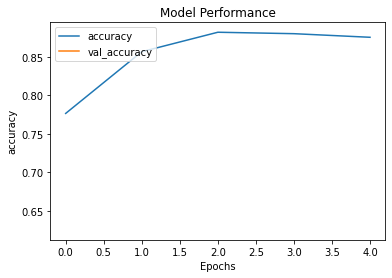

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
pneumonia_img  = image.load_img('/content/data/chest_xray/train/PNEUMONIA/person1003_bacteria_2934.jpeg', target_size=(250,250))
pneumonia_img = image.img_to_array(pneumonia_img)
print(pneumonia_img.shape)
pneumonia_img = np.expand_dims(pneumonia_img, axis=0)
pneumonia_img = pneumonia_img/255
print(pneumonia_img.shape)


(250, 250, 3)
(1, 250, 250, 3)


In [ ]:
prediction = model.predict(pneumonia_img)
print(f'Probabliltiy of that image to be a pneumonia ia:{prediction}')

Probabliltiy of that image to be a pneumonia ia:[[0.9971222]]


In [ ]:
result = model.predict_classes(pneumonia_img)
print(result)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1]]
